### Функции генераторы
https://stepik.org/lesson/640048/step/1?unit=636568

Функция генератор – это функция, которая возвращает итератор. Она выглядит как обычная функция, за исключением того, что использует выражение yield, а не return.

Когда вызывается обычная функция, она получает личное пространство имен, в котором создаются ее локальные переменные. Когда обычная функция достигает оператора return, локальные переменные уничтожаются и значение возвращается вызывающей стороне. Последующий вызов той же функции создает новое локальное пространство имен и новый набор локальных переменных.

ФУНКЦИЯ ГЕНЕРАТОР, НАПРОТИВ СОХРАНЯЕТ ЛОКАЛЬНЫЕ ПЕРЕМЕННЫЕ ОТ ВЫЗОВА К ВЫЗОВУ. ЭТО СВОЕГО РОДА ВОЗОБНОВЛЯЕМАЯ ФУНКЦИЯ.

**ГЕНЕРАТОР – ЭТО ИТЕРАТОР, КОТОРЫЙ ПОРОЖДАЕТ ЗНАЧЕНИЯ, ПЕРЕДАННЫЕ YIELD.**

Когда выполнение доходит до конца функции, объект генератор возбуждает исключение StopIteration в полном соответствии с протоколом итератора

 Генераторы — невероятно мощная программная конструкция. Они позволяют писать потоковый код с меньшим количеством промежуточных данных. Кроме того, они более эффективно используют память и ЦП.

In [4]:
def generate_ints(n):           # инициализируем генератор , порождающий числа от 0 до n-1
    for num in range(n):
        yield num


generator1 = generate_ints(5)           # создаем генератор, порождающий числа 0 1 2 3 4

print(type(generator1))

print(next(generator1))
print(next(generator1))
print(next(generator1))
print(next(generator1))
print(next(generator1))

print()

generator2 = generate_ints(3)           # создаем генератор, порождающий числа 0 1 2

for num in generator2:
    print(num)

print()

num1, num2 = generate_ints(2)           # создаем генератор, порождающий числа 0 1
print(num1, num2)

print()

*nums,  = generate_ints(10)  # создаем генератор, порождающий числа от 0 до 9
print(*nums)
# заодно вспоминаем как упаковать набор элементов в список
# упаковка в список

print(type(nums))

<class 'generator'>
0
1
2
3
4

0
1
2

0 1

0 1 2 3 4 5 6 7 8 9
<class 'list'>


In [14]:
# получить список всех атрибутов генератора можно так

def generate_1():
    yield 1

gen = generate_1()

print(dir(gen))

['__class__', '__del__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__name__', '__ne__', '__new__', '__next__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'close', 'gi_code', 'gi_frame', 'gi_running', 'gi_yieldfrom', 'send', 'throw']


Работа с генератором происходит по стандартному сценарию работы с итератором. Мы можем:

        вызывать функцию next() для получения очередного значения генератора
        итерироваться с помощью цикла for по генератору
        распаковывать генератор
        проверять принадлежность с помощью оператора in
        и т.д.

In [6]:
# если прописать генератор выше вручную, то он будет выглядеть вот так

class GenerateInts:                             
    def __init__(self, n):         # конструктор принимает верхнюю границу диапазона
        self.n = n
        self.current = 0
    
    def __iter__(self):
        return self
    
    def __next__(self): 
        if self.current == self.n:
            raise StopIteration
        else:
            self.current += 1
            return self.current - 1
        
iterator1 = GenerateInts(5)           # создаем итератор, содержащий числа 0 1 2 3 4

print(type(iterator1))

print(next(iterator1))
print(next(iterator1))
print(next(iterator1))
print(next(iterator1))
print(next(iterator1))

iterator2 = GenerateInts(3)           # создаем итератор, содержащий числа 0 1 2

for num in iterator2:
    print(num)

num1, num2 = GenerateInts(2)          # создаем итератор, содержащий числа 0 1

print(num1, num2)

print()

*nums, = GenerateInts(9)
print(nums)

<class '__main__.GenerateInts'>
0
1
2
3
4
0
1
2
0 1

[0, 1, 2, 3, 4, 5, 6, 7, 8]


#### Функции генераторы с побочными действиями
Функция генератор может не только порождать значения, но и совершать различные побочные действия во время выполнения, такие как:

- вывод текста на экран
- запись данных в файл
- приостановка исполняющейся программы на некоторое время
- и т.д.

In [7]:
# генератор, который печатает текст во время исполнения

def generate_AB():
    print('start')
    yield 'A'
    print('continue')
    yield 'B'
    print('end')

for char in generate_AB():          # здесь цикл for получает на вход итератор: iterator = iter(generate_AB())
                                    # затем вызывается next(iterator)
                                    
    print('-->', char)              # здесь на каждой итерации печатается заданная строка + значение на выходе yield 

# но до того, как дойти до первого yield - в генераторе стоит вызов print('start')

# второй вызов next происходит аналогично 


# Во время третьей итерации и третьем вызове next(iterator) генератор выполняет строку print('end') и завершает свою работу, 
# возбуждая исключение StopIteration. Цикл for перехватывает это исключение и нормально завершается.

start
--> A
continue
--> B
end


Инструкция return в теле генератора

инструкция return приводит к возбуждению исключения StopIteration

In [8]:
def generate_ints():
    yield 1
    yield 2
    return 3            # создает прерывание генератора-итератора 
    yield 4

for num in generate_ints():
    print(num)

1
2


#### Основные особенности, присущие всем функциям генераторам:

1) любая функция, содержащая ключевое слово yield, является функцией генератором

2) когда вызывается функция генератор, то она не возвращает единственное значение, как это делает обыкновенная функция

3) функция генератор всегда возвращает объект типа generator, который поддерживает протокол итератора

#### Примеры использования генераторов

In [9]:
# генератор - итератор чисел в заданном дипазоне

def counter(low, high):
    for num in range(low, high + 1):
        yield num

counter1 = counter(3, 10)

for i in counter1:
    print(i)

counter2 = counter(100, 103)
print(next(counter2))
print(next(counter2))

3
4
5
6
7
8
9
10
100
101


In [10]:
# генератор бесконечной последовательности целых четных чисел

def even_numbers(begin):
    begin += begin % 2
    while True:
        yield begin
        begin += 2

evens1 = even_numbers(10)                     # все четные числа от 10 до бесконечности

for index, num in enumerate(evens1):
    if index > 5:
        break
    print(num)

print()

evens2 = even_numbers(101)                    # все четные числа от 102 до бесконечности

print(next(evens2))
print(next(evens2))
print(next(evens2))
print(next(evens2))

10
12
14
16
18
20

102
104
106
108


In [11]:
# упаковка элементов последовательности в рамки (обрамление)
def string_wrapper(text, symbol):
    for char in text:
        yield symbol + char + symbol

string_wrapper1 = string_wrapper('beegeek', '~')

for char in string_wrapper1:
    print(char)

~b~
~e~
~e~
~g~
~e~
~e~
~k~


In [13]:
# генератор факториалов чисел

def factorials():
    value = 1
    index = 1
    while True:
        yield value 
        index += 1             # генератор ПОМНИТ последнее число предыдущей итерации
        value *= index      # генератор ПОМНИТ последнее число предыдущей итерации

infinite_factorials = factorials()

for index, num in enumerate(infinite_factorials, 1):
    if index <= 10:
        print(f'Факториал числа {index} равен {num}')
    else: break

Факториал числа 1 равен 1
Факториал числа 2 равен 2
Факториал числа 3 равен 6
Факториал числа 4 равен 24
Факториал числа 5 равен 120
Факториал числа 6 равен 720
Факториал числа 7 равен 5040
Факториал числа 8 равен 40320
Факториал числа 9 равен 362880
Факториал числа 10 равен 3628800


Хороший пример на понимание того, ЧТО возвращает генератор

In [15]:
def bee():
    yield 'b'
    yield 'e'
    yield 'e'

# здесь мы в ЯВНОМ виде не прописали никакой переменной возвращаемое значение функции-генератора
# а функция-генератор ВСЕГДА возвращает итератор

print(next(bee()))  # вернули итератор и запросили первое значение - это 'b'
print(next(bee()))  # СНОВА вернули НОВЫЙ итератор и запросили первое значение - это 'b'
print(next(bee()))  # и опять создали НОВЫЙ итератор и запросили первое значение - это 'b'

b
b
b


In [36]:
# для сравнения - укажем в ЯВНОМ виде переменную и вернем один генератор
def bee():
    yield 'b'
    yield 'e'
    yield 'e'

temp_gen = bee()
print(next(temp_gen)) 
print(next(temp_gen)) 
print(next(temp_gen))       # на этой итерации он опустошится

b
e
e


        Функция simple_sequence()
        Реализуйте генераторную функцию simple_sequence(), которая не принимает никаких аргументов.

        Функция должна возвращать генератор, порождающий бесконечную возрастающую последовательность натуральных чисел, в которой каждое число встречается столько раз, каково оно:
        1,2,2,3,3,3,4,4,4,4,..

In [38]:
def simple_sequence():
    num, ind = 1 , 0
    while True:
        ind +=1
        if ind > num:
            num = ind
            ind = 1
        yield num

infinite_seq = simple_sequence()
for ind, elem in enumerate(infinite_seq):
    if ind >= 15: break
    print(elem)


1
2
2
3
3
3
4
4
4
4
5
5
5
5
5


In [39]:
# с циклом
def simple_sequence():
    number = 1
    while True:
        for _ in range(number):
            yield number
        number += 1

infinite_seq = simple_sequence()
for ind, elem in enumerate(infinite_seq):
    if ind >= 15: break
    print(elem)


1
2
2
3
3
3
4
4
4
4
5
5
5
5
5


In [37]:
class SimSeq:
    def __init__(self) -> None:
        self.index = 0
        self.value = 1

    def __iter__(self):
        return self
    
    def __next__(self):
        self.index +=1
        if self.index > self.value:
            self.value = self.index
            self.index = 1
       

        return self.value

sim_seq = SimSeq()

for ind, elem in enumerate(sim_seq):
    if ind >= 15: break
    print(elem)

1
2
2
3
3
3
4
4
4
4
5
5
5
5
5


        Функция alternating_sequence()
        Реализуйте генераторную функцию alternating_sequence(), которая принимает один аргумент:

        count — натуральное число, по умолчанию имеет значение None
        Если count имеет значение None, функция должна возвращать генератор, порождающий бесконечный знакочередующийся ряд натуральных чисел.

        Если count имеет в качестве значения натуральное число, функция должна возвращать генератор, порождающий первые count чисел знакочередующегося ряда натуральных чисел, а затем возбуждающий исключение StopIteration.

In [54]:
def alternating_sequence(count: int = None):
    start = 1
    
    while True:
        num_sign = (1,-1)[start%2 == 0 ]
        start = abs(start) + 1
        yield (start - 1) * num_sign
        if abs(start)-1 == count: return 

alt_seq = alternating_sequence()
print(next(alt_seq))
print(next(alt_seq))
print(next(alt_seq))

print(next(alt_seq))
print(next(alt_seq))
print(next(alt_seq))


1
-2
3
-4
5
-6


In [55]:
generator = alternating_sequence(10)

print(*generator)


1 -2 3 -4 5 -6 7 -8 9 -10


        Функция primes()
        Реализуйте генераторную функцию primes(), которая принимает два аргумента в следующем порядке:

        left — натуральное число
        right — натуральное число
        Функция должна возвращать генератор, порождающий последовательность простых чисел от left до right включительно, а затем возбуждающий исключение StopIteration.

        Примечание 1. Гарантируется, что left <= right.

        Примечание 2. Простое число — натуральное число, имеющее ровно два различных натуральных делителя — единицу и самого себя. Единица простым числом не является. 

In [70]:
def is_prime(number):
    if number == 1: return False
    for num in range (2,number):
        if number%num == 0:
            return False
    return True

def primes(left,right):
    
    while left <= right:
        left +=1
        if is_prime(left-1):
            yield left-1

generator = primes(1, 15)

print(*generator)

2 3 5 7 11 13


In [71]:
generator = primes(6, 36)

print(next(generator))
print(next(generator))

7
11


In [69]:
def is_prime(number):
    if number == 1: return False
    for num in range (2,number):
        if number%num == 0:
            return False
    return True

is_prime(997)

True

In [65]:
is_prime(15)

False

In [67]:
is_prime(17)

True

        Функция reverse()
        Реализуйте генераторную функцию reverse(), которая принимает один аргумент:

        sequence — последовательность
        Функция должна возвращать генератор, порождающий элементы последовательности sequence в обратном порядке, а затем возбуждающий исключение StopIteration.

        Примечание 1. Последовательностью является коллекция, поддерживающая индексацию и имеющая длину. Например, объекты типа list, str, tuple являются последовательностями.

In [76]:
def reverse(sequence):
    ind=0
    while True:
        ind +=1
        try:
            res = sequence[-ind]
            yield res
        except IndexError:
            return
        

print(*reverse([1, 2, 3, 4, 5]))

5 4 3 2 1


In [77]:
generator = reverse('beegeek')

print(type(generator))
print(*generator)

<class 'generator'>
k e e g e e b


        Функция dates()
        Реализуйте генераторную функцию dates(), которая принимает два аргумента в следующем порядке:

        start — дата, тип date
        count — натуральное число, по умолчанию имеет значение None
        Если count имеет значение None, функция должна возвращать генератор, порождающий последовательность из максимально допустимого количества дат (тип date), начиная с даты start.

        Если count имеет в качестве значения натуральное число, функция должна возвращать генератор, порождающий последовательность из count дат (тип date), начиная с даты start, а затем возбуждающий исключение StopIteration.

In [98]:
from datetime import date, timedelta
def dates(start: date, count: int = None):
    end = start
    while (end - start).days != count:
        try: 
            end += timedelta(days=1)
            yield end - timedelta(days=1)
        except :
            yield end
            return

generator = dates(date(2022, 3, 8))

print(next(generator))
print(next(generator))
print(next(generator))

print()

generator = dates(date(2022, 3, 8), 5)

print(*generator)

Exception ignored in: <generator object dates at 0x108395540>
Traceback (most recent call last):
  File "/var/folders/9t/0d2y6zvs0pn1b5hks81yn5jw0000gn/T/ipykernel_43151/75712271.py", line 20, in <module>
RuntimeError: generator ignored GeneratorExit


2022-03-08
2022-03-09
2022-03-10

2022-03-08 2022-03-09 2022-03-10 2022-03-11 2022-03-12


In [97]:
generator = dates(date(9999, 1, 7))

for _ in range(348):
    next(generator)

print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))

try:
   print(next(generator))
except StopIteration:
    print('Error')

9999-12-21
9999-12-22
9999-12-23
9999-12-24
9999-12-25
9999-12-26
9999-12-27
9999-12-28
9999-12-29
9999-12-30
9999-12-31
Error


In [85]:
from datetime import date, timedelta
(date(2022,4,2) - date (2022,4,1))

datetime.timedelta(days=1)

In [87]:
date(2022,4,2) + timedelta(days=1)

datetime.date(2022, 4, 3)

        Функция card_deck()
        Реализуйте генераторную функцию card_deck(), которая принимает один аргумент:

        suit — одна из четырех карточных мастей: пик, треф, бубен, червей
        Функция должна возвращать генератор, циклично порождающий колоду игральных карт без масти suit. Каждая карта должна представлять собой строку в следующем формате:

        <номинал> <масть>
        Например, 7 пик, валет треф, дама бубен, король червей, туз пик.

        Примечание 1. Карты, генерируемые итератором, должны располагаться сначала по величине номинала, затем масти.

        Примечание 2. Старшинство мастей по возрастанию: пики, трефы, бубны, червы. Старшинство карт в масти по возрастанию: двойка, тройка, четверка, пятерка, шестерка, семерка, восьмерка, девятка, десятка, валет, дама, король, туз.

        Примечание 3. Масти не требуют склонения и независимо от номинала должны сохранять следующее написание: пик, треф, бубен, червей.

In [140]:
def card_deck(suit):
    card_values = ('2','3','4','5','6','7','8',
                    '9','10','валет','дама','король','туз')
    card_suites = ['пик','треф','бубен','червей']
    card_suites.remove(suit)

    ind_val , ind_suit = -1, -1 
    while True:
        ind_suit +=1
        if ind_suit >2:
            ind_suit = -1
            continue
        while ind_val != 12:
            ind_val +=1
            yield f'{card_values[ind_val]} {card_suites[ind_suit]}'
        ind_val = -1
        
        


generator = card_deck('пик')

print(next(generator))
print(next(generator))
print(next(generator))

2 треф
3 треф
4 треф


In [141]:
generator = card_deck('треф')

for ind,card in enumerate(generator,1):
    if ind>=62: break
    print(card)

2 пик
3 пик
4 пик
5 пик
6 пик
7 пик
8 пик
9 пик
10 пик
валет пик
дама пик
король пик
туз пик
2 бубен
3 бубен
4 бубен
5 бубен
6 бубен
7 бубен
8 бубен
9 бубен
10 бубен
валет бубен
дама бубен
король бубен
туз бубен
2 червей
3 червей
4 червей
5 червей
6 червей
7 червей
8 червей
9 червей
10 червей
валет червей
дама червей
король червей
туз червей
2 пик
3 пик
4 пик
5 пик
6 пик
7 пик
8 пик
9 пик
10 пик
валет пик
дама пик
король пик
туз пик
2 бубен
3 бубен
4 бубен
5 бубен
6 бубен
7 бубен
8 бубен
9 бубен
10 бубен


In [142]:
generator = card_deck('треф')
cards = [next(generator) for _ in range(40)]

print(*cards)

2 пик 3 пик 4 пик 5 пик 6 пик 7 пик 8 пик 9 пик 10 пик валет пик дама пик король пик туз пик 2 бубен 3 бубен 4 бубен 5 бубен 6 бубен 7 бубен 8 бубен 9 бубен 10 бубен валет бубен дама бубен король бубен туз бубен 2 червей 3 червей 4 червей 5 червей 6 червей 7 червей 8 червей 9 червей 10 червей валет червей дама червей король червей туз червей 2 пик


In [104]:
abcd = ['пик','треф','бубен','червей']

abcd.remove('пик')

abcd

['треф', 'бубен', 'червей']

In [143]:
# красивое решение на генератор игральных карт

def card_deck(suit):
    nums = list(range(2, 11)) + ['валет', 'дама', 'король', 'туз']
    deck = ['пик', 'треф', 'бубен', 'червей']
    while True:
        for i in deck:
            if i == suit:
                continue
            for num in nums:
                yield f'{num} {i}'


generator = card_deck('треф')
cards = [next(generator) for _ in range(40)]

print(*cards)

2 пик 3 пик 4 пик 5 пик 6 пик 7 пик 8 пик 9 пик 10 пик валет пик дама пик король пик туз пик 2 бубен 3 бубен 4 бубен 5 бубен 6 бубен 7 бубен 8 бубен 9 бубен 10 бубен валет бубен дама бубен король бубен туз бубен 2 червей 3 червей 4 червей 5 червей 6 червей 7 червей 8 червей 9 червей 10 червей валет червей дама червей король червей туз червей 2 пик


#### Конструкция yield from

In [144]:
def get_data():
    for num in range(5):
        yield num
    for char in 'ABC':
        yield char

for i in get_data():
    print(i)

0
1
2
3
4
A
B
C


можно заменить упрощенным кодом

In [146]:
def get_data():
    yield from range(5)     # объединить две конструкции: yield и цикл for
    yield from 'ABC'

for i in get_data():
    print(i)

0
1
2
3
4
A
B
C


Объединение конструкции yield и цикла for лишь часть возможностей yield from. 
        
        На самом деле конструкция yield from позволяет вкладывать один генератор в другой, таким образом создавать субгенераторы (вложенные генераторы).

In [147]:
def generator2():
    yield 'Red'
    yield 'Blue'

def generator1():
    yield 'Green'
    yield from generator2()            # запрашиваем значение из субгенератора
    yield 'Yellow'
    yield 'Black'

for color in generator1():
    print(color, end=' ')

Green Red Blue Yellow Black 

Когда генератор generator1() вызывает yield from generator2(), субгенератор generator2() перехватывает управление и начинает отдавать значения туда, откуда был вызван generator1(). А тем временем generator1() остается блокированным в ожидании завершения generator2(). Таким образом, эффект получается таким же, как если бы тело субгенератора было встроено в месте, где находится выражение yield from

#### Рекурсивные функции-генераторы

In [148]:
def numbers(start):
    if not isinstance(start, int):
        raise TypeError('Аргументом должно быть целое число')
    yield start
    yield from numbers(start + 1)


for index, number in enumerate(numbers(3)):
    if index > 5:
        break
    print(number)

3
4
5
6
7
8


        Функция matrix_by_elem()
        Вам доступна генераторная функция matrix_by_elem(), которая принимает в качестве аргумента матрицу произвольной размерности и возвращает генератор, порождающий последовательность элементов переданной матрицы.

        Перепишете данную функцию с использованием конструкции yield from, чтобы она выполняла ту же задачу

In [150]:
def matrix_by_elem(matrix):
    for line in matrix:
        yield from line

print(*matrix_by_elem([[1,2], [3,4], [5,6]]))

1 2 3 4 5 6


        Функция palindromes()
        Реализуйте генераторную функцию palindromes(), которая не принимает никаких аргументов.

        Функция должна возвращать генератор, порождающий бесконечную последовательность натуральных чисел-палиндромов.

In [153]:
def palindromes():
    num = 0 
    while True:
        num +=1
        if str(num) == str(num)[::-1]:
            yield num



generator = palindromes()
numbers = [next(generator) for _ in range(30)]

print(*numbers)

1 2 3 4 5 6 7 8 9 11 22 33 44 55 66 77 88 99 101 111 121 131 141 151 161 171 181 191 202 212


        Функция flatten()
        Реализуйте генераторную функцию flatten(), которая принимает один аргумент:

        nested_list — список, элементами которого являются целые числа или списки, элементами которых, в свою очередь, также являются либо целые числа, либо списки; вложенность может быть произвольной
        Функция должна возвращать генератор, порождающий все числа, содержащиеся в nested_list, включая все числа из всех вложенных списков, а затем возбуждает исключение StopIteration.

In [166]:
def flatten(nested_list):
    res = []
    for elem in nested_list:
        if isinstance(elem, list):
            res.extend(flatten(elem))
        else: res.append(elem)
    return iter(res)

generator = flatten([[1, 2], [[3]], [[4], 5]])

print(*generator)

1 2 3 4 5


In [167]:
def flatten(nested_list):
    for i in nested_list:
        if isinstance(i, list):
            yield from flatten(i)
        else:
            yield i

generator = flatten([[1, 2], [[3]], [[4], 5]])

print(*generator)

1 2 3 4 5


### Генераторные выражения

Почему генераторные выражения, а не списочные выражения?

потому что списочное выражение хранится в памяти целиком, в отличие от генераторного выражения, создающего элементы "на лету" при вызове next() 

In [2]:
from sys import getsizeof

numbers = [1, 9, 8, 7, 90, -56, -34, 56, 100, 90, 2, 8]

even_numbers = (num for num in numbers if num % 2 == 0)         # используем круглые скобки

print(type(even_numbers))
print(even_numbers)
print(getsizeof(even_numbers))

print()

# аналог на списочном выражении займет больше места

from sys import getsizeof

numbers = [1, 9, 8, 7, 90, -56, -34, 56, 100, 90, 2, 8]

even_numbers = [num for num in numbers if num % 2 == 0]

print(type(even_numbers))
print(even_numbers)
print(getsizeof(even_numbers))

<class 'generator'>
<generator object <genexpr> at 0x10d8c6ce0>
104

<class 'list'>
[8, 90, -56, -34, 56, 100, 90, 2, 8]
184


особенности генераторных выражений:

- Генераторные выражения не поддерживают получение элемента по индексу.
- К генераторному выражению нельзя применить обычные операции среза.
- После использования генераторного выражения, оно остается пустым

- Генераторные выражения занимают немного больше памяти, чем соответствующие аналоги map(), filter() с лямбда функциями

- Генераторные выражения более компактны, но менее универсальны, чем полные генераторные функции

In [3]:
# опустошение генераторного выражения

squares = (i*i for i in range(10))

first, second = next(squares), next(squares)

nums1 = list(squares)
nums2 = list(squares)

print(first)
print(second)
print(nums1)
print(nums2)

0
1
[4, 9, 16, 25, 36, 49, 64, 81]
[]


In [7]:
# проверка простого числа через генераторное выражение

def is_prime(number):
    return all(number%num != 0 for num in range(2,number)) and number !=1



is_prime(1)


False

In [8]:
# посчитать число элементов итерируемого объекта

def count_iterable(iterable):
    return sum(1 for _ in iterable)

data = tuple(range(432, 3845, 17))

print(count_iterable(data))

201


In [9]:
count_iterable = lambda iter: sum(1 for _ in iter)

data = tuple(range(432, 3845, 17))

print(count_iterable(data))

201


        Функция all_together()
        Реализуйте функцию all_together() с использованием генераторных выражений, которая принимает произвольное количество позиционных аргументов, каждый из которых является итерируемым объектом.

        Функция должна возвращать генератор, порождающий каждый элемент всех переданных итерируемых объектов: сначала все элементы первого итерируемого объекта, затем второго, и так далее.

In [11]:
def all_together(*args):
    return (elem for arg in args for elem in arg)

objects = [range(3), 'bee', [1, 3, 5], (2, 4, 6)]

print(*all_together(*objects))

0 1 2 b e e 1 3 5 2 4 6


In [12]:
all_together = lambda *args: (elem for arg in args for elem in arg) 

objects = [[1, 2, 3], [(0, 0), (1, 1)], {'geek': 1}]

print(*all_together(*objects))

1 2 3 (0, 0) (1, 1) geek


        Функция interleave()
        Реализуйте функцию interleave() с использованием генераторных выражений, которая принимает произвольное количество позиционных аргументов, каждый из которых является последовательностью.

        Функция должна возвращать генератор, порождающий каждый элемент всех переданных последовательностей: сначала первый элемент первой последовательности, затем первый элемент второй последовательности, и так далее; после второй элемент первой последовательности, затем второй элемент второй последовательности, и так далее.

In [32]:
def interleave(*args):
    return (elem for tup in zip(*args) for elem in tup)

print(*interleave('bee', '123'))

b 1 e 2 e 3


In [34]:
interleave = lambda *args: (elem for tup in zip(*args) for elem in tup)

In [35]:
numbers = [1, 2, 3]
squares = [1, 4, 9]
qubes = [1, 8, 27]

print(*interleave(numbers, squares, qubes))

1 1 1 2 4 8 3 9 27


### Конвейер генераторов 
https://stepik.org/lesson/673155/step/1?unit=671418

Самое главное в конвейерах генераторов это то, что обработка данных происходит по одному элементу за раз. Между этапами обработки в цепочке нет **БУФЕРИЗАЦИИ**: генератор целых чисел выдает единственное значение

Можно расширять цепочку генераторов, чтобы построить конвейер обработки со многими шагами. Он по-прежнему будет работать эффективно и может быть легко изменен, поскольку каждый шаг в цепочке представляет собой отдельную генераторную функцию.

А весь конвейер будет работать пошагово.

In [37]:
# пример конвейера

n = 10

integers = (i for i in range(1, n + 1))
evens = (i for i in integers if not i % 2)
squared = (i * i for i in evens)
negated = (-i for i in squared)

print(*negated)

-4 -16 -36 -64 -100


Пример использования: чтение массивных файлов БЕЗ СЧИТЫВАНИЯ всего содержимого файла в память

In [ ]:
with open('data.csv', 'r', encoding='utf-8') as file:
    file_lines = (line for line in file)                                    # генератор всех линий текстового файла
    line_values = (line.rstrip().split(',') for line in file_lines)         # генератор линий без разделителя (запятой)
    file_headers = next(line_values)                                        # заголовки столбцов
    line_dicts = (dict(zip(file_headers, data)) for data in line_values)    # превратили данные в вид {заголовок: значение столбца}

    result = (                                  # здесь собрали значения столбцов юзер и адрес юзера для строк, в которых
        line['user_name'], line['user_ip']      # есть упоминание stepic.org
        for line in line_dicts
        if 'stepik.org' in line['page_url']
        )

    for index, (name, ip) in enumerate(set(result), 1):     # здесь уже происходит ИТЕРАЦИЯ и считывание в память
        print(f'{index}. {name} --- {ip}')

# до последнего действия в память сохранялись только ГЕНЕРАТОРЫ, но не данные файла. Память не заполнялась

# Функция set() заставляет работать все созданные генераторы вместе. 
# Все они функционируют как один конвейер больших данных, при этом в память попадают только нужные строки.


#### Производительность при чтении больших файлов

In [ ]:
# функция считывает данные в последовательность
def read_immediately(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        result = []
        for line in file:
            line = line.rstrip('\n')
            if line != '':
                result.append(line)
        return result

# функция считывает данные в генератор (то есть только при явном итерировании)
def read_lazy(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.rstrip('\n')
            if line != '':
                yield line

Результаты по соотношению скорость-время будут впечатляющими.

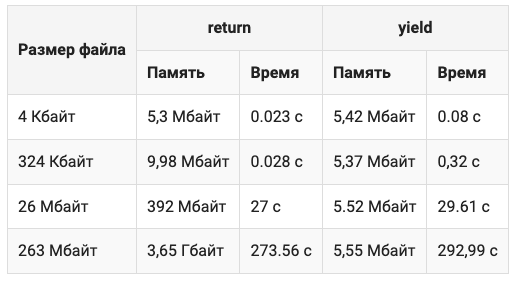

### Задачи на конвейеры генераторов

        Вам доступен именованный кортеж Person, который содержит данные о человеке. Первым элементом именованного кортежа является имя и фамилия человека, вторым — национальность, третьим — пол, четвертым — год рождения, пятым — год смерти. Если человек жив, год смерти считается равным 0. Также доступен список persons, содержащий эти кортежи.

        Дополните приведенный ниже код с использованием конвейеров генераторов, чтобы он вывел имя и фамилию самого молодого живого мужчины (male) из Швеции (Swedish).

In [39]:
from collections import namedtuple

Person = namedtuple('Person', ['name', 'nationality', 'sex', 'birth', 'death'])

persons = [Person('E. M. Ashe', 'American', 'male', 1867, 1941),
           Person('Goran Aslin', 'Swedish', 'male', 1980, 0),
           Person('Erik Gunnar Asplund', 'Swedish', 'male', 1885, 1940),
           Person('Genevieve Asse', 'French', 'female', 1949, 0),
           Person('Irene Adler', 'Swedish', 'female', 2005, 0),
           Person('Sergio Asti', 'Italian', 'male', 1926, 0),
           Person('Olof Backman', 'Swedish', 'male', 1999, 0),
           Person('Alyson Hannigan', 'Swedish', 'female', 1940, 1987),
           Person('Dana Atchley', 'American', 'female', 1941, 2000),
           Person('Monika Andersson', 'Swedish', 'female', 1957, 0),
           Person('Shura_Stone', 'Russian', 'male', 2000, 0),
           Person('Jon Bale', 'Swedish', 'male', 2000, 0)]

alive_swedish_men = (person for person in persons if person.nationality == 'Swedish' and\
                      person.death == 0\
                          and person.sex == 'male')
print(max(alive_swedish_men, key= lambda person: person.birth).name)

Jon Bale


        Назовем диапазоном запись двух натуральных чисел через дефис a-b, где a — левая граница диапазона, b — правая граница диапазона, причем a <= b. Диапазон содержит в себе все числа от a до b включительно. Например, диапазон 1-4 содержит числа 1,2,3,4
        Реализуйте генераторную функцию parse_ranges(), которая принимает один аргумент:

        ranges — строка, в которой через запятую указаны диапазоны чисел
        Функция должна возвращать генератор, порождающий последовательность чисел, содержащихся в диапазонах ranges.

        Примечание 1. В тестирующую систему сдайте программу, содержащую только необходимую функцию parse_ranges(), но не код, вызывающий ее.

In [42]:
parse_ranges = lambda ranges: (digit for some_range in ranges.split(',') \
                               for digit in range(int(some_range.split('-')[0]),
                                                  int(some_range.split('-')[1]) +1 ) )

print(*parse_ranges('1-2,4-4,8-10'))


1 2 4 8 9 10
<class 'function'>


        Функция filter_names()
        Реализуйте генераторную функцию filter_names(), которая принимает три аргумента в следующем порядке:

        names — список имен
        ignore_char — одиночный символ
        max_names — натуральное число
        Функция должна возвращать генератор, порождающий max_names имён из списка names, игнорируя имена, которые

        начинаются на ignore_char (в любом регистре)
        содержат хотя бы одну цифру
        Если max_names больше количества имен в списке names, то генератор должен породить все возможные имена из данного списка. 

        Примечание 1. Имена в возвращаемом функцией генераторе должны располагаться в своем исходном порядке.

In [52]:
def filter_names(names: list, ignore_char: str, max_names: int) :
    is_contain_dig = lambda name: all(char.isalpha() for char in name)
    def gen_names():
        counter = 0
        for name in names:
            if is_contain_dig(name) and name[0].lower() != ignore_char.lower():
                counter +=1
                yield name
            if counter == max_names: return
    return gen_names()

data = ['Dima', 'Timur', 'Arthur', 'Anri20', 'Arina', 'German', 'Ruslan']

print(*filter_names(data, 'D', 3))

Timur Arthur Arina


        Напишите программу с использованием конвейеров генераторов, определяющую общую сумму, которая была инвестирована в раунде а, и выводящую полученный результат.

In [55]:
import pandas as pd
df = pd.read_csv('https://stepik.org/media/attachments/lesson/673155/data.csv')

df

,company,raisedAmt,round
0,LifeLock,6850000,b
1,LifeLock,6000000,a
2,LifeLock,25000000,c
3,MyCityFaces,50000,seed
4,Flypaper,3000000,a
...,...,...,...
1455,Trusera,2000000,angel
1456,Alerts.com,1200000,a
1457,Myrio,20500000,unattributed
1458,Grid Networks,9500000,a


In [59]:
df[df['round'] == 'a'].raisedAmt.sum()

4380015000

In [66]:
df[df['round'] == 'a']

,company,raisedAmt,round
1,LifeLock,6000000,a
4,Flypaper,3000000,a
5,Infusionsoft,9000000,a
10,Digg,2800000,a
12,Facebook,12700000,a
...,...,...,...
1448,TeachStreet,2250000,a
1451,Infinia,9500000,a
1453,Cozi,3000000,a
1456,Alerts.com,1200000,a


In [69]:
with open('/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/data (1).csv',
           'r', encoding='utf-8') as file:
    file_lines = (line for line in file)                                    # генератор всех линий текстового файла
    line_values = (line.rstrip().split(',') for line in file_lines)         # генератор линий без разделителя (запятой)
    file_headers = next(line_values)                                        # заголовки столбцов
    line_dicts = (dict(zip(file_headers, data)) for data in line_values)    # превратили данные в вид {заголовок: значение столбца}

    result = ( line['raisedAmt'] 
              for line in line_dicts 
              if line['round'] == 'a')

    for index, raisedAmt in enumerate(result, 1):     # здесь уже происходит ИТЕРАЦИЯ и считывание в память
        print(f'{index}. {raisedAmt}')

    # print(sum(map(int, result)))

1. 6000000
2. 3000000
3. 9000000
4. 2800000
5. 12700000
6. 3000000
7. 1500000
8. 6300000
9. 3710000
10. 13500000
11. 9000000
12. 3800000
13. 12500000
14. 5000000
15. 2250000
16. 2250000
17. 5000000
18. 5200000
19. 5000000
20. 4000000
21. 7500000
22. 25000000
23. 3000000
24. 3500000
25. 11100000
26. 6000000
27. 10000000
28. 1000000
29. 5000000
30. 5000000
31. 13000000
32. 7000000
33. 4000000
34. 4250000
35. 3100000
36. 6000000
37. 500000
38. 7000000
39. 1000000
40. 3200000
41. 2200000
42. 6800000
43. 1500000
44. 1300000
45. 1000000
46. 1000000
47. 15000000
48. 15000000
49. 1100000
50. 7000000
51. 16000000
52. 1500000
53. 1200000
54. 300000
55. 350000
56. 4000000
57. 5000000
58. 3500000
59. 4700000
60. 1600000
61. 10000000
62. 14000000
63. 1500000
64. 1800000
65. 5000000
66. 10000000
67. 1500000
68. 325000
69. 7700000
70. 6200000
71. 6000000
72. 7000000
73. 2100000
74. 5000000
75. 6000000
76. 3000000
77. 8000000
78. 2000000
79. 6250000
80. 20000000
81. 7000000
82. 10000000
83. 2700000
84

        Функция years_days()
        Реализуйте генераторную функцию years_days(), которая принимает один аргумент:

        year — натуральное число
        Функция должна возвращать генератор, порождающий последовательность всех дат (тип date) в году year.

        Примечание 1. Возьмем в качестве примера 2022 год. 
        
        Тогда генератор, полученный при вызове years_days(2022), должен порождать сначала все даты с 
        1
        1 по 
        31
        31 января, затем с 
        1
        1 по 
        28
        28 февраля, и так далее до 
        31
        31 декабря.

In [81]:
import calendar
from datetime import date, timedelta
def years_days(year):
    start = date(year, 1,1)
    while start != date(year,12,31) + timedelta(days=1):
        yield start
        start += timedelta(days=1)

dates = years_days(2022)
for _ in range(365):
    print(next(dates))


2022-01-01
2022-01-02
2022-01-03
2022-01-04
2022-01-05
2022-01-06
2022-01-07
2022-01-08
2022-01-09
2022-01-10
2022-01-11
2022-01-12
2022-01-13
2022-01-14
2022-01-15
2022-01-16
2022-01-17
2022-01-18
2022-01-19
2022-01-20
2022-01-21
2022-01-22
2022-01-23
2022-01-24
2022-01-25
2022-01-26
2022-01-27
2022-01-28
2022-01-29
2022-01-30
2022-01-31
2022-02-01
2022-02-02
2022-02-03
2022-02-04
2022-02-05
2022-02-06
2022-02-07
2022-02-08
2022-02-09
2022-02-10
2022-02-11
2022-02-12
2022-02-13
2022-02-14
2022-02-15
2022-02-16
2022-02-17
2022-02-18
2022-02-19
2022-02-20
2022-02-21
2022-02-22
2022-02-23
2022-02-24
2022-02-25
2022-02-26
2022-02-27
2022-02-28
2022-03-01
2022-03-02
2022-03-03
2022-03-04
2022-03-05
2022-03-06
2022-03-07
2022-03-08
2022-03-09
2022-03-10
2022-03-11
2022-03-12
2022-03-13
2022-03-14
2022-03-15
2022-03-16
2022-03-17
2022-03-18
2022-03-19
2022-03-20
2022-03-21
2022-03-22
2022-03-23
2022-03-24
2022-03-25
2022-03-26
2022-03-27
2022-03-28
2022-03-29
2022-03-30
2022-03-31
2022-04-01

        Функция nonempty_lines()
        Реализуйте генераторную функцию nonempty_lines(), которая принимает один аргумент:

        file — название текстового файла, например, data.txt
        Функция должна возвращать генератор, порождающий последовательность всех непустых строк файла file с убранным символом переноса строки \n. Если строка содержит более 
        25
        25 символов, она заменяется многоточием ....

In [13]:
def nonempty_lines(file):
    with open(file, 'r', encoding= 'utf-8') as file:
        all_lines = (line.strip() for line in file.readlines() if not line.isspace())
        return ((line, '...')[len(line)>25] for line in all_lines)
        
filename = '/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/diary.txt'

lines = nonempty_lines(filename)
#print(type(lines))

print(next(lines))
print(next(lines))
print(next(lines))
print(next(lines))

print(*nonempty_lines('/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/diary.txt'))


23.03.2008; 19:16
...
...
...
23.03.2008; 19:16 ... ... ... ... ... 15.03.2008; 20:32 ... ... ... ... ... ... 08.03.2008; 22:03 ... ... ... ... ... ... 14.03.2008; 17:14 ... ... ... ... ... ... ... ... 07.04.2008; 20:20 ... ... ... ... ... 09.04.2008; 17:31 ... ... ... ... ... ... ... ... 04.03.2008; 21:59 ... ... ... ... 26.03.2008; 19:17 ... ... 25.03.2008; 23:31 ... ... ... ... 15.04.2008; 15:53 ... ... ... ... ... ... ... ... ... ... ... 21.04.2008; 16:17 ... ... ... ... ... ... ... 22.03.2008; 13:37 ... ... ... ... ... 27.02.2008; 19:51 ... 03.04.2008; 18:22 ... ... ... ... ... 01.03.2008; 18:01 ... ... ... ... ... 13.04.2008; 22:15 ... ... ... ... ... ... ... ... 02.03.2008; 17:43 ... ... 05.04.2008; 16:17 ... ... ... ... 17.03.2008; 19:09 ... ... ... ... ... ... ... ... ... ... 11.04.2008; 22:46 ... ... ... ... ... ... 12.04.2008; 21:38 ... ... ... 26.02.2008; 18:55 ... 17.04.2008; 23:11 ... ... ... ... ... ... 11.03.2008; 16:13 ... ... ... ... ... ... ... ... 24.04.2008; 15:17 

In [5]:
res = (i**2 for i in range(100))

type(res)

generator

        Вам доступен файл planets.txt, содержащий информацию о различных планетах. В первых четырех строках указаны характеристики первой планеты, после чего следует пустая строка, затем характеристики второй планеты, и так далее

        Реализуйте генераторную функцию txt_to_dict(), которая не принимает никаких аргументов.

        Функция должна возвращать генератор, порождающий последовательность словарей, каждый из которых содержит информацию об очередной планете из файла planets.txt, а именно ее название, диаметр, массу и орбитальный период. Например:

        {'Name': 'Mercury', 'Diameter': '4879.4', 'Mass': '3.302×10^23', 'OrbitalPeriod': '0.241'}

In [93]:
def txt_to_dict():
    from functools import reduce
    from itertools import islice
    
    # функция трансформации списка в словарь
    def list_to_dict(a:list) -> dict:
        it = iter(a)
        return dict(zip(it, it))
    
    # чтение файла
    with open('/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/planets.txt',
        'r', encoding='utf-8') as file:

        num_lines = (len(file.readlines()) +1) * 4 /5
        file.seek(0)
    
        file_lines = (line.strip() for line in file.readlines() \
                    if not line.isspace())                # генератор всех линий текстового файла без пустых строк
        
    
        # генератор всех линий, разбитых на списки [name,val]
        splited_lines = (line.split(' = ') for line in file_lines)

        # генератор всех линий,  превращаемых в словари {name:val}
        lines_dicts = (list_to_dict(elem) for elem in splited_lines)

        # генератор объединения в блоки по 4 элемента в каждом : каждая планета имеет 4 характеристики: 
        # имя, диаметр, масса, орбитальный период
        blocks_of_lines= (islice(lines_dicts, 4) for _ in range(int(num_lines/4)))

        res = (reduce(lambda a,b: a | b, elem) for elem in blocks_of_lines)

        return res
    
planets = txt_to_dict()
print(next(planets))

        

{'Name': 'Mercury', 'Diameter': '4879.4', 'Mass': '3.302×10^23', 'OrbitalPeriod': '0.241'}


In [94]:
# а это простое решение

def txt_to_dict():
    '''Функция-генератор для файла с блоками произвольного размера. Блоки разделены пустой строкой'''
    with open('/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/planets.txt', encoding='utf-8') as file:        
        lines = map(str.rstrip, file)        
        blocks = ((line, *(iter(lambda: next(lines), ''))) for line in lines)        
        yield from (dict(item.split(' = ') for item in block) for block in blocks)

planets = txt_to_dict()
print(next(planets))

{'Name': 'Mercury', 'Diameter': '4879.4', 'Mass': '3.302×10^23', 'OrbitalPeriod': '0.241'}


Описание кода ниже:
1) читаем по одной строке из файла, попутно избавляясь от переноса на след строку

2) каждую строку передаем в фильтр, который убирает пустые строки (стоит параметр None)

3) распаковка фильтра в цикле из 4 итераций с обратной запаковкой через zip приводи к созданию ленивого итератора, содержащего четыре генератора, пакующего содержимое строк по 4 штуки

4) на выходе - единый генератор, в котором элементы предыдущих генераторов на каждой итерации сплитятся в списки [ключ, значение], а из них создаются словари

In [98]:
# еще проще
def txt_to_dict():
    with open('/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/planets.txt', encoding='utf-8') as file:
        planets = zip(*(filter(None, (line.strip() for line in file)) for _ in range(4)))
        yield from (dict(item.split(' = ') for item in planet) for planet in planets)

planets = txt_to_dict()
print(next(planets))
print(next(planets))
print(next(planets))
print(next(planets))
print(next(planets))
print(next(planets))
print(next(planets))
print(next(planets))
print(next(planets))
print(next(planets))        # генератор опустошен, поэтому эта итерация вызывает исключение


{'Name': 'Mercury', 'Diameter': '4879.4', 'Mass': '3.302×10^23', 'OrbitalPeriod': '0.241'}
{'Name': 'Venus', 'Diameter': '12103.6', 'Mass': '4.869×10^24', 'OrbitalPeriod': '0.615'}
{'Name': 'Earth', 'Diameter': '12756.3', 'Mass': '5.974×10^24', 'OrbitalPeriod': '1'}
{'Name': 'Mars', 'Diameter': '6794.4', 'Mass': '6.419×10^23', 'OrbitalPeriod': '1.881'}
{'Name': 'Jupiter', 'Diameter': '142984', 'Mass': '1.899×10^27', 'OrbitalPeriod': '11.86'}
{'Name': 'Saturn', 'Diameter': '120536', 'Mass': '5.688×10^26', 'OrbitalPeriod': '29.46'}
{'Name': 'Uranus', 'Diameter': '51118', 'Mass': '8.683×10^25', 'OrbitalPeriod': '84.01'}
{'Name': 'Neptune', 'Diameter': '49572', 'Mass': '1.024×10^26', 'OrbitalPeriod': '164.79'}
{'Name': 'Pluton', 'Diameter': '2370.0', 'Mass': '1.3×10^22', 'OrbitalPeriod': '247.7406624'}


StopIteration: 

Описание кода ниже:
1) читаем файл целиком, дробим его на списки по двойному переходу на строки - так получаем блоки из четырех строк.
По сути разделителем является пустая строка

2) каждый блок (список из четырех строк) бьем по переходу на новую строку - получаем 4 списка внутри блока, каждый из которых содержит одну строку

3) идем циклом по этому генератору, содержащему блоки, которые содержат списки строк:

- объект итерации - один блок (планета)
- внутри планеты - по 4 списка (имя, масса, диаметр и орбита)
- каждый объект внутри списка бьем по знаку ' = ' - теперь из этих частей генерируется словарь - строго внутри одного блока

4) в процессе итерирования объявляем результат блока - это сгенерированный словарь

In [99]:
# еще веселее

def txt_to_dict():
    with open('/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/planets.txt', 'r', encoding='utf8') as f:
        planets_raw = (i.split('\n') for i in f.read().split('\n\n'))
        for planet in planets_raw:
            yield {k: v for k,v in (i.split(' = ') for i in planet)}

planets = txt_to_dict()
print(next(planets))

{'Name': 'Mercury', 'Diameter': '4879.4', 'Mass': '3.302×10^23', 'OrbitalPeriod': '0.241'}


In [16]:
# проверить пустая строка или нет
print('     '.isspace())
print('     1   '.isspace())


True
False


In [63]:
with open('/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/planets.txt',
           'r', encoding='utf-8') as file:
    smth = [line.strip() for line in file.readlines() if not line.isspace()]

smth

['Name = Mercury',
 'Diameter = 4879.4',
 'Mass = 3.302×10^23',
 'OrbitalPeriod = 0.241',
 'Name = Venus',
 'Diameter = 12103.6',
 'Mass = 4.869×10^24',
 'OrbitalPeriod = 0.615',
 'Name = Earth',
 'Diameter = 12756.3',
 'Mass = 5.974×10^24',
 'OrbitalPeriod = 1',
 'Name = Mars',
 'Diameter = 6794.4',
 'Mass = 6.419×10^23',
 'OrbitalPeriod = 1.881',
 'Name = Jupiter',
 'Diameter = 142984',
 'Mass = 1.899×10^27',
 'OrbitalPeriod = 11.86',
 'Name = Saturn',
 'Diameter = 120536',
 'Mass = 5.688×10^26',
 'OrbitalPeriod = 29.46',
 'Name = Uranus',
 'Diameter = 51118',
 'Mass = 8.683×10^25',
 'OrbitalPeriod = 84.01',
 'Name = Neptune',
 'Diameter = 49572',
 'Mass = 1.024×10^26',
 'OrbitalPeriod = 164.79',
 'Name = Pluton',
 'Diameter = 2370.0',
 'Mass = 1.3×10^22',
 'OrbitalPeriod = 247.7406624']

In [62]:
a = ['1=2','2=3','3=4','4=5','5=6','6=7','7=8','8=9','9=20','0=1','12=13','13=14']
b= [elem.split('=') for elem in a]

print(b)

def list_to_dict(a:list) -> dict:
    it = iter(a)
    return dict(zip(it, it))

abc = [list_to_dict(elem) for elem in b]
print(abc)
abcd = iter(abc)

c= [list(islice(abcd,4)) for _ in range(int(len(a)/4))]
print(c)

from functools import reduce
print()
res = [reduce(lambda a,b: a | b, elem) for elem in c]

print(res)

[['1', '2'], ['2', '3'], ['3', '4'], ['4', '5'], ['5', '6'], ['6', '7'], ['7', '8'], ['8', '9'], ['9', '20'], ['0', '1'], ['12', '13'], ['13', '14']]
[{'1': '2'}, {'2': '3'}, {'3': '4'}, {'4': '5'}, {'5': '6'}, {'6': '7'}, {'7': '8'}, {'8': '9'}, {'9': '20'}, {'0': '1'}, {'12': '13'}, {'13': '14'}]
[[{'1': '2'}, {'2': '3'}, {'3': '4'}, {'4': '5'}], [{'5': '6'}, {'6': '7'}, {'7': '8'}, {'8': '9'}], [{'9': '20'}, {'0': '1'}, {'12': '13'}, {'13': '14'}]]

[{'1': '2', '2': '3', '3': '4', '4': '5'}, {'5': '6', '6': '7', '7': '8', '8': '9'}, {'9': '20', '0': '1', '12': '13', '13': '14'}]


In [83]:
with open('/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/planets.txt',
        'r', encoding='utf-8') as file:
    
    file_lines = (line.strip() for line in file.readlines() \
                    if not line.isspace()) 
    
    
    

    for count, line in  enumerate(file, 1):
        pass
    
    print(count)
    

    for line in file_lines:
        print(line)

36
Name = Mercury
Diameter = 4879.4
Mass = 3.302×10^23
OrbitalPeriod = 0.241
Name = Venus
Diameter = 12103.6
Mass = 4.869×10^24
OrbitalPeriod = 0.615
Name = Earth
Diameter = 12756.3
Mass = 5.974×10^24
OrbitalPeriod = 1
Name = Mars
Diameter = 6794.4
Mass = 6.419×10^23
OrbitalPeriod = 1.881
Name = Jupiter
Diameter = 142984
Mass = 1.899×10^27
OrbitalPeriod = 11.86
Name = Saturn
Diameter = 120536
Mass = 5.688×10^26
OrbitalPeriod = 29.46
Name = Uranus
Diameter = 51118
Mass = 8.683×10^25
OrbitalPeriod = 84.01
Name = Neptune
Diameter = 49572
Mass = 1.024×10^26
OrbitalPeriod = 164.79
Name = Pluton
Diameter = 2370.0
Mass = 1.3×10^22
OrbitalPeriod = 247.7406624


In [88]:
with open('/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/planets.txt',
        'r', encoding='utf-8') as file:
    a = file.readlines()

from sys import getsizeof
getsizeof(a)

472

        Функция unique()
        Реализуйте генераторную функцию, которая принимает один аргумент:

        iterable — итерируемый объект
        Функция должна возвращать генератор, порождающий последовательность элементов итерируемого объекта iterable без дубликатов.

In [126]:
def unique(iterable):
    from collections import Counter

    for elem in Counter(iterable):
        yield elem

iterator = iter('111222333')
uniques = unique(iterator)

print(next(uniques))
print(next(uniques))
print(next(uniques))

1
2
3


        Функция stop_on()
        Реализуйте генераторную функцию, которая принимает два аргумента в следующем порядке:

        iterable — итерируемый объект
        obj — произвольный объект
        Функция должна возвращать генератор, порождающий последовательность элементов итерируемого объекта iterable до тех пор, пока не будет достигнут элемент, равный obj. Если итерируемый объект iterable не содержит ни одного элемента, равного obj, генератор должен породить все элементы iterable.

        Примечание 1. Элементы итерируемого объекта в возвращаемом функцией генераторе должны располагаться в своем исходном порядке.

In [130]:
def stop_on(iterable, obj):
    iterator = iter(iterable)
    for ind, elem in enumerate(iterator):
        if elem == obj:
            return
        yield elem

numbers = [1, 2, 3, 4, 5]

print(*stop_on(numbers, 4))

iterator = iter('beegeek')

print(*stop_on(iterator, 'a'))

1 2 3
b e e g e e k


        Функция with_previous()
        Реализуйте генераторную функцию, которая принимает один аргумент:

        iterable — итерируемый объект
        Функция должна возвращать генератор, порождающий последовательность кортежей, каждый из которых содержит очередной элемент итерируемого объекта iterable, а также предшествующий ему элемент:

        (<очередной элемент>, <предыдущий элемент>)
        Для первого элемента предыдущим считается значение None.

        Примечание 1. Элементы итерируемого объекта в возвращаемом функцией генераторе должны располагаться в своем исходном порядке.

In [160]:
def with_previous(iterable):
    if not iterable: return []
    iterator = iter(iterable)
    a= next(iterator)
    b = None 
    yield (a,b)
    for elem in iterator:
        
        b= a
        a= elem
        yield (a,b)


numbers = [1, 2, 3, 4, 5]

print(*with_previous(numbers))

print(list(with_previous('')))

(1, None) (2, 1) (3, 2) (4, 3) (5, 4)
[]


In [161]:
def with_previous(iterable):
    prev = None
    for e in iterable:
        yield e, prev
        prev = e

numbers = [1, 2, 3, 4, 5]

print(*with_previous(numbers))

print(list(with_previous('')))

(1, None) (2, 1) (3, 2) (4, 3) (5, 4)
[]


        Функция pairwise()
        Реализуйте генераторную функцию, которая принимает один аргумент:

        iterable — итерируемый объект
        Функция должна возвращать генератор, порождающий последовательность кортежей, каждый из которых содержит очередной элемент итерируемого объекта iterable, а также следующий за ним элемент:

        (<очередной элемент>, <следующий элемент>)
        Для последнего элемента следующим считается значение None.

In [173]:
def pairwise(iterable):
    if not iterable: return []
    iterator = iter(iterable)
    prev = next(iterator)
    try:
        while True:
            nxt = next(iterator)
            yield prev, nxt
            prev = nxt
    except StopIteration:
        yield (prev, None)

numbers = [1, 2, 3, 4, 5]

print(*pairwise(numbers))

iterator = pairwise('A')

print(next(iterator))

(1, 2) (2, 3) (3, 4) (4, 5) (5, None)
('A', None)


        Функция around()
        Реализуйте генераторную функцию, которая принимает один аргумент:

        iterable — итерируемый объект
        Функция должна возвращать генератор, порождающий последовательность кортежей, каждый из которых содержит очередной элемент итерируемого объекта iterable, а также предыдущий и следующий за ним элементы:

        (<предыдущий элемент>, <очередной элемент>, <следующий элемент>)
        Для первого элемента предыдущим считается значение None, для последнего элемента следующим считается так же значение None.

In [190]:
def around(iterable):

    if not iterable: return []
    
    iterator = iter(iterable)
    first, current  = None, next(iterator)
    try:
        while True:
            last = next(iterator)
            yield first, current, last
            first = current
            current = last
    except StopIteration:
        yield first, current, None

numbers = [1, 2, 3, 4, 5]

print(*around(numbers))

iterator = iter('hey')

print(*around(iterator))

(None, 1, 2) (1, 2, 3) (2, 3, 4) (3, 4, 5) (4, 5, None)
(None, 'h', 'e') ('h', 'e', 'y') ('e', 'y', None)
